In [9]:
# Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as ms

ms.use("seaborn-muted")
%matplotlib inline

import itertools

import librosa
import librosa.display

import IPython

import sklearn

import math

import warnings

import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
)

from sklearn.decomposition import PCA

from keras.models import Sequential
from tensorflow import keras as k

import os

C:\Users\lrsko\AppData\Local\Temp\ipykernel_788\2275442566.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  ms.use("seaborn-muted")


<IPython.core.display.Javascript object>

In [2]:
# Load nb_black for code formating

%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
# Create feature list for dataframe

features = [
    librosa.feature.mfcc,
    librosa.feature.chroma_stft,
    librosa.feature.chroma_cqt,
    librosa.feature.chroma_cens,
    librosa.feature.melspectrogram,
    librosa.feature.rms,
    librosa.feature.spectral_centroid,
    librosa.feature.spectral_bandwidth,
    librosa.feature.spectral_contrast,
    librosa.feature.spectral_rolloff,
]

genre_dict = {
    "blues": 0,
    "classical": 1,
    "country": 2,
    "disco": 3,
    "hiphop": 4,
    "jazz": 5,
    "metal": 6,
    "pop": 7,
    "reggae": 8,
    "rock": 9,
}

path_audio_files = "Data/genres_original/"

<IPython.core.display.Javascript object>

In [23]:
# Load dataframe from file

df = pd.read_csv("Features_dataframe.csv")

<IPython.core.display.Javascript object>

In [24]:
# Create X (features dataframe), and y (genre series) for classification

X = df.loc[
    :,
    ~df.columns.isin(["file_name", "genre"]),
]
y = df["genre"]

<IPython.core.display.Javascript object>

In [25]:
# Labels encoding to numeric values

class_list = df.iloc[:, -1]
convertor = LabelEncoder()
y_cnn = convertor.fit_transform(class_list)

<IPython.core.display.Javascript object>

In [26]:
# Train test split

X_cnn_train, X_cnn_test, y_cnn_train, y_cnn_test = train_test_split(
    X, y_cnn, test_size=0.25, random_state=42, stratify=y_cnn, shuffle=True
)

<IPython.core.display.Javascript object>

In [27]:
# StandardScaler standardizes a features, train and test data transformed separately

standard_scaler = StandardScaler()
X_cnn_train = standard_scaler.fit_transform(X_cnn_train)
X_cnn_test = standard_scaler.transform(X_cnn_test)

<IPython.core.display.Javascript object>

In [39]:
# Function for model training


def trainModel(model, epochs):
    batch_size = 32
    # callback = myCallback()
    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy"
    )
    return model.fit(
        X_cnn_train,
        y_cnn_train,
        validation_data=(X_cnn_test, y_cnn_test),
        epochs=epochs,
        batch_size=batch_size,
    )

<IPython.core.display.Javascript object>

In [29]:
# Model

model = k.models.Sequential(
    [
        k.layers.Dense(24, activation="relu", input_shape=(X_cnn_train.shape[1],)),
        k.layers.Dropout(0.2),
        k.layers.Dense(24, activation="relu"),
        k.layers.Dropout(0.2),
        k.layers.Dense(16, activation="relu"),
        k.layers.Dropout(0.2),
        k.layers.Dense(10, activation="softmax"),
    ]
)

print(model.summary())
model_history = trainModel(model=model, epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 24)                936       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_5 (Dense)             (None, 24)                600       
                                                                 
 dropout_4 (Dropout)         (None, 24)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                400       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 10)               

24/24 [==============================] - 0s 3ms/step - loss: 1.2082 - accuracy: 0.5480 - val_loss: 1.0040 - val_accuracy: 0.6880
Epoch 50/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2213 - accuracy: 0.5613 - val_loss: 1.0101 - val_accuracy: 0.6920
Epoch 51/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1977 - accuracy: 0.5560 - val_loss: 1.0041 - val_accuracy: 0.6720
Epoch 52/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1903 - accuracy: 0.5667 - val_loss: 0.9968 - val_accuracy: 0.6960
Epoch 53/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1793 - accuracy: 0.5907 - val_loss: 0.9929 - val_accuracy: 0.6760
Epoch 54/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1604 - accuracy: 0.5667 - val_loss: 0.9811 - val_accuracy: 0.6640
Epoch 55/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1675 - accuracy: 0.5787 - val_loss: 0.9838 - val_accuracy: 0.6920
Epoch 56/100
24/24 

<IPython.core.display.Javascript object>

In [58]:
# Test / train accuracy

train_loss, train_acc = model.evaluate(X_cnn_train, y_cnn_train, batch_size=32)
test_loss, test_acc = model.evaluate(X_cnn_test, y_cnn_test, batch_size=32)
# 24/24 [==============================] - 0s 1ms/step - loss: 0.6300 - accuracy: 0.8040
# 8/8 [==============================] - 0s 1ms/step - loss: 0.8732 - accuracy: 0.7280

8/8 [==============================] - 0s 1ms/step - loss: 0.8732 - accuracy: 0.7280


<IPython.core.display.Javascript object>

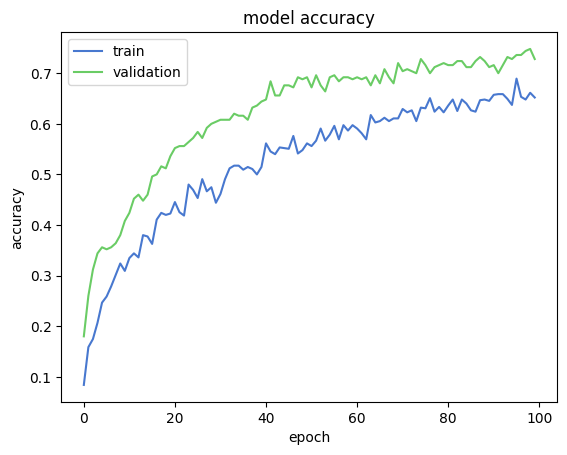

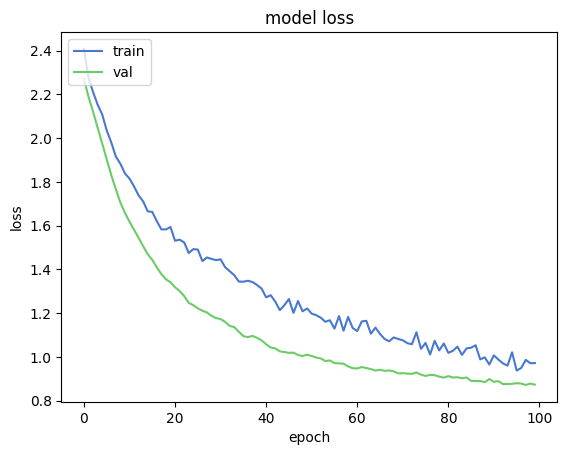

<IPython.core.display.Javascript object>

In [31]:
# Plotting Model accuracy and Model loss

import matplotlib.pyplot as plt


def plot_accuracy_hist(model_history, accuracy="accuracy"):
    plt.plot(model_history.history[accuracy])
    plt.plot(model_history.history["val_" + accuracy])
    plt.title("model accuracy")
    plt.ylabel(accuracy)
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


def plot_loss_hist(model_history):
    plt.plot(model_history.history["loss"])
    plt.plot(model_history.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "val"], loc="upper left")
    plt.show()


plot_accuracy_hist(model_history)
plot_loss_hist(model_history)

In [38]:
y_pred = model.predict(X_cnn_test, batch_size=32)  ## xtest
round_y_preds = np.argmax(y_pred, axis=-1)
cm = confusion_matrix(y_true=y_cnn_test, y_pred=round_y_preds)

8/8 [==============================] - 0s 856us/step


<IPython.core.display.Javascript object>

In [35]:
# Function for confusion matrix plot

def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

Confusion matrix, without normalization
[[19  0  0  1  1  0  0  0  3  1]
 [ 0 24  0  0  0  1  0  0  0  0]
 [ 0  0 22  1  0  1  0  0  0  1]
 [ 0  1  1 13  2  0  0  4  2  2]
 [ 0  0  0  5 14  0  1  0  5  0]
 [ 1  1  2  0  0 20  0  0  0  1]
 [ 2  0  0  1  4  0 18  0  0  0]
 [ 0  0  1  0  1  0  0 21  2  0]
 [ 0  0  1  0  1  0  0  1 21  1]
 [ 1  0  7  0  0  2  0  1  4 10]]


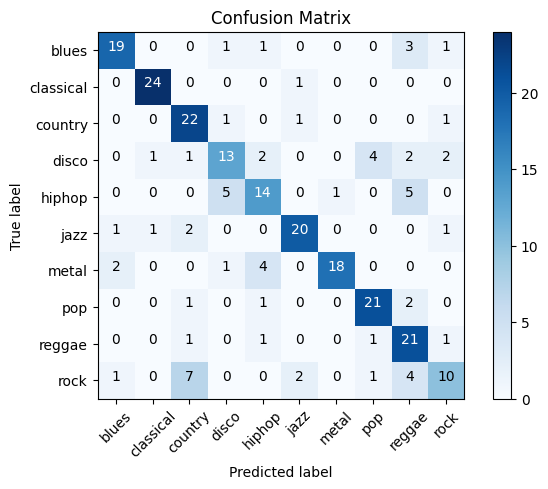

<IPython.core.display.Javascript object>

In [37]:
# Plot Confusion Matrix

cm_plot_labels = [
    "blues",
    "classical",
    "country",
    "disco",
    "hiphop",
    "jazz",
    "metal",
    "pop",
    "reggae",
    "rock",
]

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")